## Importing Libraries

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly_express as px
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  



import plotly_express as px
from sklearn.model_selection import train_test_split

## Reading the data

In [93]:
data = pd.read_csv("Loan payments data.csv")

In [94]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [95]:
data.shape

(500, 11)

## Data-PreProcessing

In [96]:

data.isnull().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [97]:
data[data['paid_off_time'].isna()][['loan_status','paid_off_time']]

,loan_status,paid_off_time
300,COLLECTION,NaN
301,COLLECTION,NaN
302,COLLECTION,NaN
303,COLLECTION,NaN
304,COLLECTION,NaN
...,...,...
395,COLLECTION,NaN
396,COLLECTION,NaN
397,COLLECTION,NaN
398,COLLECTION,NaN


In [98]:
data['effective_date'] = pd.to_datetime(data['effective_date'])
data['due_date']=pd.to_datetime(data['due_date'])
data['paid_off_time']=pd.to_datetime(data['paid_off_time'])

In [ ]:
## Calculating the difference between the paid off and due date and fill those null values in past_due_days

In [99]:
y = abs(data['paid_off_time']-data['due_date'])
data['past_due_days']=data['past_due_days'].fillna(y.dt.days)

In [100]:
y.dt.days

0      22.0
1       0.0
2      11.0
3       0.0
4      14.0
       ... 
495     3.0
496    14.0
497     3.0
498     1.0
499     8.0
Length: 500, dtype: float64

In [101]:
## Checking the null values if any
data[(data['paid_off_time'].isna()) & (data['past_due_days'].isna())]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender


In [102]:
data.drop(['paid_off_time'],axis = 1,inplace = True)

In [103]:
data.isnull().sum()

Loan_ID           0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
past_due_days     0
age               0
education         0
Gender            0
dtype: int64

In [104]:
data['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
past_due_days     500 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


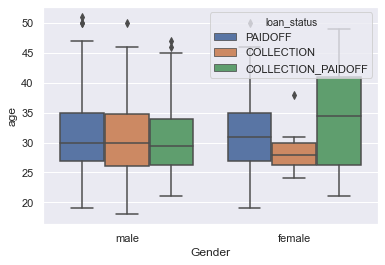

In [106]:
sns.boxplot(x = 'Gender',y='age',hue='loan_status',data=data)

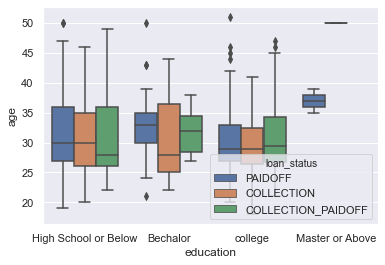

In [107]:
sns.boxplot(x = 'education',y='age',hue='loan_status',data=data)

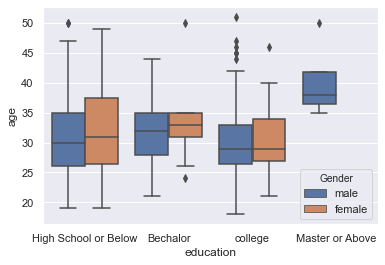

In [108]:
sns.boxplot(x='education',y='age',hue='Gender',data=data)

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null datetime64[ns]
due_date          500 non-null datetime64[ns]
past_due_days     500 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


In [110]:
data[['terms','Principal']]

,terms,Principal
0,30,1000
1,30,1000
2,30,1000
3,15,1000
4,30,1000
...,...,...
495,30,1000
496,15,1000
497,15,800
498,30,1000


In [111]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,22.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,11.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,14.0,28,college,female


In [112]:
configure_plotly_browser_state()
px.scatter(data, x="age", y="terms" ,color="loan_status",
           hover_data=["Gender"], log_x=True, size_max=60)

In [113]:
data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,22.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,11.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,14.0,28,college,female


In [114]:
data['past_due_days'].tail()

495     3.0
496    14.0
497     3.0
498     1.0
499     8.0
Name: past_due_days, dtype: float64

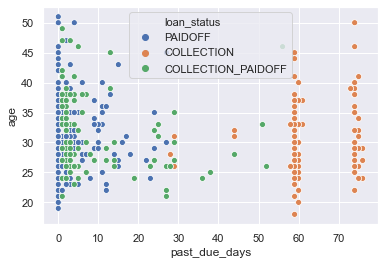

In [115]:
sns.scatterplot(x='past_due_days',y = 'age',hue='loan_status',data=data)

In [116]:
data.drop(['effective_date','Loan_ID','due_date'],axis =1,inplace = True)

In [117]:
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,22.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bechalor,female
2,PAIDOFF,1000,30,11.0,33,Bechalor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,14.0,28,college,female


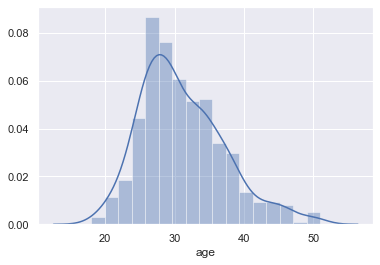

In [118]:
sns.distplot(data['age'])

In [119]:
data['age'].min()

18

In [120]:
data['age'].max()

51

In [122]:
data['age'].value_counts()

26    46
29    42
27    38
30    37
28    32
33    30
35    26
34    25
24    23
31    22
25    20
32    20
38    19
37    19
36    14
39    10
23    10
40     8
22     8
21     7
45     5
46     5
41     5
43     5
44     4
50     4
20     4
42     4
47     3
19     2
51     1
49     1
18     1
Name: age, dtype: int64

In [123]:
for i in data.index:
    if (data['age'][i]<28):
        data['age'][i]="New_age_people"
    elif((data['age'][i]>28) & (data['age'][i]<38)):
            data['age'][i]="Middle_age_people"
    else:
        data['age'][i] = 'Old_age_people'

In [124]:
type(data['age'][0])

str

In [125]:
data['age'].unique()

array(['Old_age_people', 'Middle_age_people', 'New_age_people'],
      dtype=object)

In [126]:
dummy = pd.get_dummies(data['age'],drop_first=True)

In [127]:
dummy

,New_age_people,Old_age_people
0,0,1
1,0,1
2,0,0
3,1,0
4,0,1
...,...,...
495,0,1
496,1,0
497,0,0
498,0,1


In [128]:
dummy1=pd.get_dummies(data['education'],drop_first=True)

In [129]:
dummy2=pd.get_dummies(data['Gender'],drop_first=True)

In [130]:
data.drop(['age'],axis = 1,inplace = True)

In [131]:
data['past_due_days'].value_counts()

0.0     181
2.0      46
1.0      46
59.0     40
3.0      26
74.0     25
4.0      18
60.0     13
5.0      11
75.0      7
29.0      7
9.0       6
6.0       6
11.0      5
27.0      5
12.0      5
14.0      4
7.0       4
24.0      4
10.0      4
8.0       3
44.0      3
15.0      3
76.0      3
13.0      3
22.0      2
23.0      2
61.0      2
58.0      2
28.0      2
25.0      2
16.0      1
18.0      1
17.0      1
51.0      1
73.0      1
36.0      1
38.0      1
19.0      1
52.0      1
56.0      1
Name: past_due_days, dtype: int64

In [132]:
data.head()

,loan_status,Principal,terms,past_due_days,education,Gender
0,PAIDOFF,1000,30,22.0,High School or Below,male
1,PAIDOFF,1000,30,0.0,Bechalor,female
2,PAIDOFF,1000,30,11.0,Bechalor,female
3,PAIDOFF,1000,15,0.0,college,male
4,PAIDOFF,1000,30,14.0,college,female


In [133]:
data.drop(['education','Gender'],axis = 1,inplace = True)

In [134]:
scaled = data.drop(['loan_status'],axis = 1)

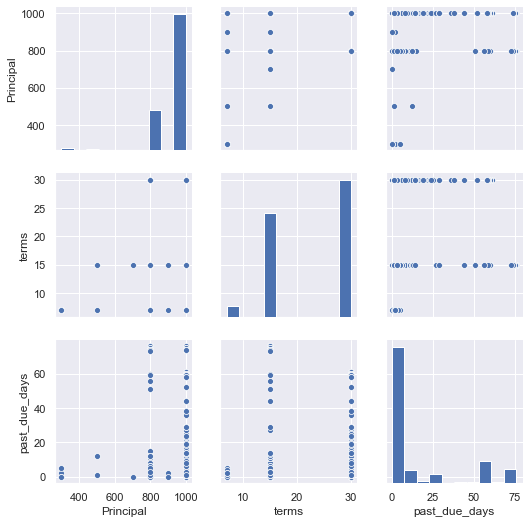

In [135]:
sns.pairplot(scaled)

In [136]:
from sklearn.preprocessing import MinMaxScaler
input_scaled = MinMaxScaler()

In [137]:
input_scaled.fit(scaled)

MinMaxScaler()

In [138]:
input_scaled = input_scaled.transform(scaled)

In [139]:
input_scaled = pd.DataFrame(input_scaled,columns=scaled.columns)

In [140]:
input_scaled

,Principal,terms,past_due_days
0,1.000000,1.000000,0.289474
1,1.000000,1.000000,0.000000
2,1.000000,1.000000,0.144737
3,1.000000,0.347826,0.000000
4,1.000000,1.000000,0.184211
...,...,...,...
495,1.000000,1.000000,0.039474
496,1.000000,0.347826,0.184211
497,0.714286,0.347826,0.039474
498,1.000000,1.000000,0.013158


In [141]:
df = pd.concat([input_scaled,dummy,dummy1,dummy2],axis = 1)

In [142]:
df

,Principal,terms,past_due_days,New_age_people,Old_age_people,High School or Below,Master or Above,college,male
0,1.000000,1.000000,0.289474,0,1,1,0,0,1
1,1.000000,1.000000,0.000000,0,1,0,0,0,0
2,1.000000,1.000000,0.144737,0,0,0,0,0,0
3,1.000000,0.347826,0.000000,1,0,0,0,1,1
4,1.000000,1.000000,0.184211,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
495,1.000000,1.000000,0.039474,0,1,1,0,0,1
496,1.000000,0.347826,0.184211,1,0,1,0,0,1
497,0.714286,0.347826,0.039474,0,0,0,0,1,1
498,1.000000,1.000000,0.013158,0,1,0,0,1,0


In [147]:
y.value_counts()

PAIDOFF       400
COLLECTION    100
Name: loan_status, dtype: int64

In [144]:
data['loan_status']=data['loan_status'].map({'PAIDOFF':'PAIDOFF',"COLLECTION_PAIDOFF":"PAIDOFF","COLLECTION":"COLLECTION"})

In [145]:
data['loan_status'].value_counts()

PAIDOFF       400
COLLECTION    100
Name: loan_status, dtype: int64

In [146]:
x=df
y=data['loan_status']

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 32)

In [149]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Importing other tools
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV

In [150]:
seed=42

# Creating Models

lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
svc = SVC(random_state=seed, probability=True)
dtree = DecisionTreeClassifier(random_state=seed)
rf = RandomForestClassifier(10, random_state=seed)
gdb = GradientBoostingClassifier(random_state=seed)
adb = AdaBoostClassifier(random_state=seed)
xgb = XGBClassifier(random_state=seed)
knn = KNeighborsClassifier()
lgbm = LGBMClassifier(random_state=seed)



In [151]:
first_models = [ lr, lda, svc, dtree, 
                 rf, gdb, adb, xgb, knn, lgbm]
first_model_names = ['Logistic Regression','LDA','SVM','Decision Tree', 
                     'Random Forest', 'GradientBoosting',
                    'AdaBoost', 'XGB', 'K-Neighbors','Light GBM']


In [152]:
y_null=y.value_counts()[0]/len(y)
y_null

0.8

In [153]:
metrices = pd.DataFrame()

In [154]:
def model_fit(model,name):
    row_index=0
    for (i,j) in zip(model,name):
        #print("Name:",name)
        metrices.loc[row_index,'Name'] = j
        i.fit(x_train,y_train)
        score = i.score(x_train,y_train)
        #print("Train Score:",score)
        metrices.loc[row_index,'Train Score'] = score
        test_score=i.score(x_test,y_test)
        #print("Test Score:",test_score)
        metrices.loc[row_index,'Test Score'] = test_score
        y_predict = i.predict(x_test)
        #print("Null_MAE:",null_mae)
        metrices.loc[row_index,"Null_Accuracy"] = y_null
        accuracy=accuracy_score(y_test,y_predict)
        #print("TEST_MAE:",mae)
        metrices.loc[row_index,"Accuracy_score"]=accuracy
        row_index = row_index+1
            

In [155]:
model_fit(first_models,first_model_names)

In [156]:
metrices.sort_values(by='Test Score',ascending = False)

,Name,Train Score,Test Score,Null_Accuracy,Accuracy_score
3,Decision Tree,0.9975,0.98,0.8,0.98
5,GradientBoosting,0.9975,0.98,0.8,0.98
6,AdaBoost,0.9975,0.98,0.8,0.98
0,Logistic Regression,0.9850,0.97,0.8,0.97
2,SVM,0.9850,0.97,0.8,0.97
1,LDA,0.9825,0.96,0.8,0.96
7,XGB,0.9900,0.96,0.8,0.96
8,K-Neighbors,0.9750,0.96,0.8,0.96
9,Light GBM,0.9950,0.96,0.8,0.96
4,Random Forest,0.9975,0.95,0.8,0.95


In [157]:
y_predict = dtree.predict(x_test)

In [158]:
confusion_matrix(y_test,y_predict)

array([[21,  0],
       [ 2, 77]], dtype=int64)

In [159]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

  COLLECTION       0.91      1.00      0.95        21
     PAIDOFF       1.00      0.97      0.99        79

    accuracy                           0.98       100
   macro avg       0.96      0.99      0.97       100
weighted avg       0.98      0.98      0.98       100



In [160]:
y_test.value_counts()

PAIDOFF       79
COLLECTION    21
Name: loan_status, dtype: int64

In [161]:
from sklearn.linear_model import LogisticRegression

In [162]:
log = LogisticRegression()

In [163]:
log.fit(x_train,y_train)

LogisticRegression()

In [164]:
y_predict = log.predict(x_test)

In [165]:
log.score(x_train,y_train)

0.985

In [166]:
log.score(x_test,y_test)

0.97

In [167]:
accuracy_score(y_test,y_predict)

0.97

In [168]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[20  1]
 [ 2 77]]
              precision    recall  f1-score   support

  COLLECTION       0.91      0.95      0.93        21
     PAIDOFF       0.99      0.97      0.98        79

    accuracy                           0.97       100
   macro avg       0.95      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



In [169]:
gdb_y_predict = gdb.predict(x_test)

In [170]:
confusion_matrix(y_test,gdb_y_predict)

array([[21,  0],
       [ 2, 77]], dtype=int64)